# Imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
std_norm = scipy.stats.norm(0,1)

import time

Matplotlib is building the font cache; this may take a moment.


In [12]:
import sys, os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from main.matrix_inverters import Gower_Richtarik_2016_1 as algo1

# Define matrices

# Benchmark

In [51]:
Ns = (np.linspace(1, 10, 20) * 300).astype(int)
print(Ns.min(), Ns.max())

300 3000


In [48]:
np_times = []

for n in Ns:
    A = np.matrix(std_norm.rvs((n, n)))
    start = time.time()
    _ = np.linalg.inv(A)
    np_times.append(time.time() - start)

In [49]:
sp_times = []

for n in Ns:
    A = np.matrix(std_norm.rvs((n, n)))
    start = time.time()
    _ = scipy.linalg.inv(A)
    sp_times.append(time.time() - start)

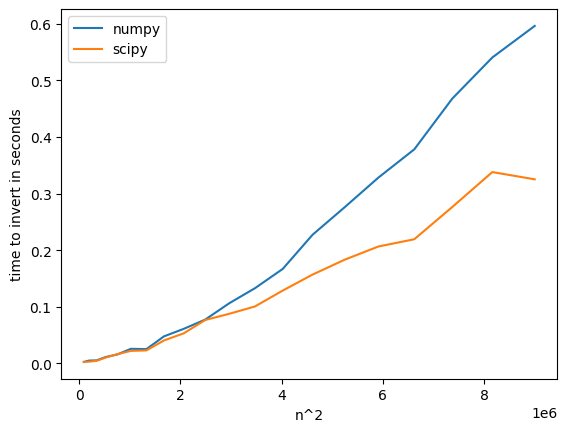

In [52]:
plt.plot(Ns ** 2, np_times, label='numpy')
plt.plot(Ns ** 2, sp_times, label='scipy')
plt.xlabel('n^2')
plt.ylabel('time to invert in seconds')
plt.legend()
plt.show()